In [171]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment

In [172]:
f = 'Bottle.wav'
samplerate, data = wavfile.read(f)
print('Sampling Rate:',samplerate)
print('Audio Shape:',np.shape(data))

Sampling Rate: 44100
Audio Shape: (59262, 2)


C:\Users\leous\AppData\Local\Temp\ipykernel_25780\2869860332.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(f)


In [173]:
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector
print(f"длительность {duration} \n временная шкала {time}")

длительность 1.3438095238095238 
 временная шкала [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 1.34374150e+00
 1.34376417e+00 1.34378685e+00]


In [174]:
type(data)

numpy.ndarray

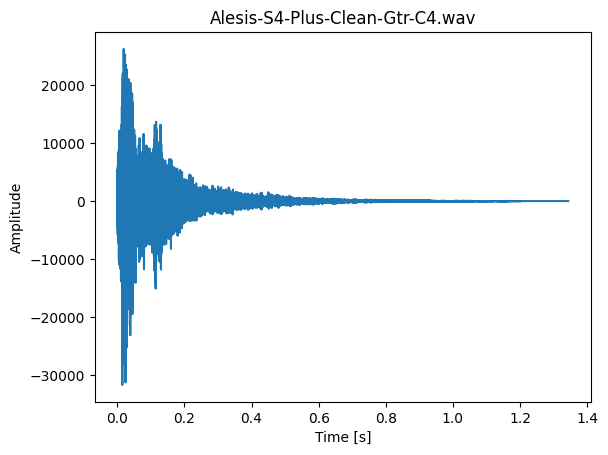

In [175]:
plt.plot(time, data[:, 0])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Alesis-S4-Plus-Clean-Gtr-C4.wav')
plt.show()

In [176]:
# слушаем, что получилось
sd.play(data[:, 0], samplerate)
sd.wait()

# Stereo to Mono

Sampling Rate: 44100
Audio Shape: (59262,)


C:\Users\leous\AppData\Local\Temp\ipykernel_25780\2324951501.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t,a,'k-',color='purple')


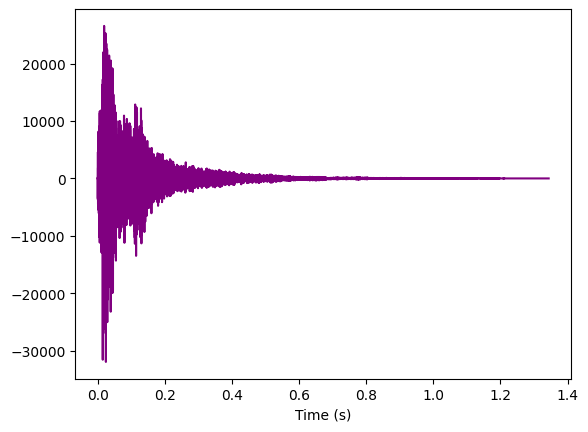

In [177]:
asegment = AudioSegment.from_wav(f)
asegment = asegment.set_channels(1)
asegment.export("mono.wav",format="wav")
s,a = wavfile.read("mono.wav")
print('Sampling Rate:',s)
print('Audio Shape:',np.shape(a))
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector
na = data.shape[0]
la = na / s
t = np.linspace(0,la,na)
plt.plot(t,a,'k-',color='purple')
plt.xlabel('Time (s)')
plt.show()

# Спектрограмма

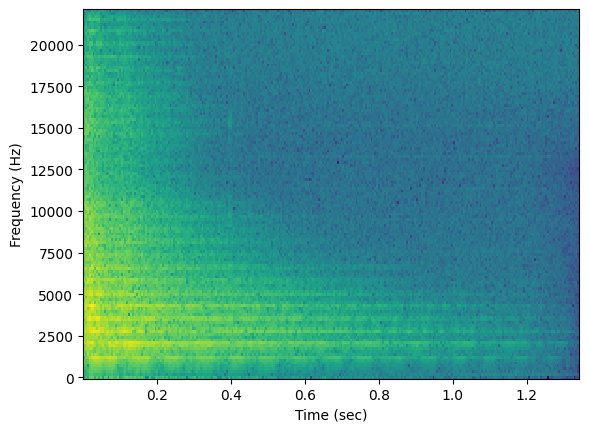

In [178]:
adata = data[:, 0]
s = samplerate
fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

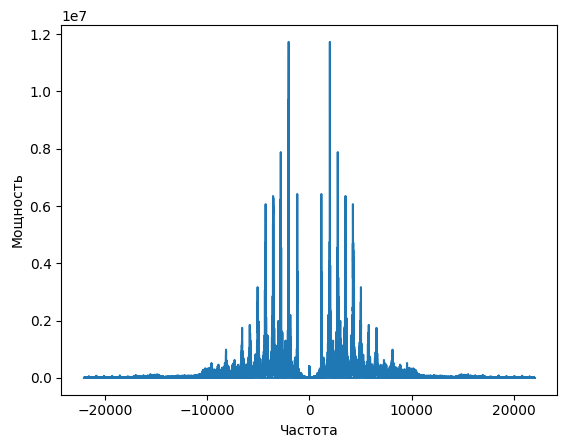

In [179]:
from scipy.fft import fft, fftfreq
# число точек в normalized_tone
N = int(samplerate * duration)
yf = fft(data[:, 0])
xf = fftfreq(N, 1 / samplerate)
plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()

In [180]:
np.max(xf) 

22049.25584691708

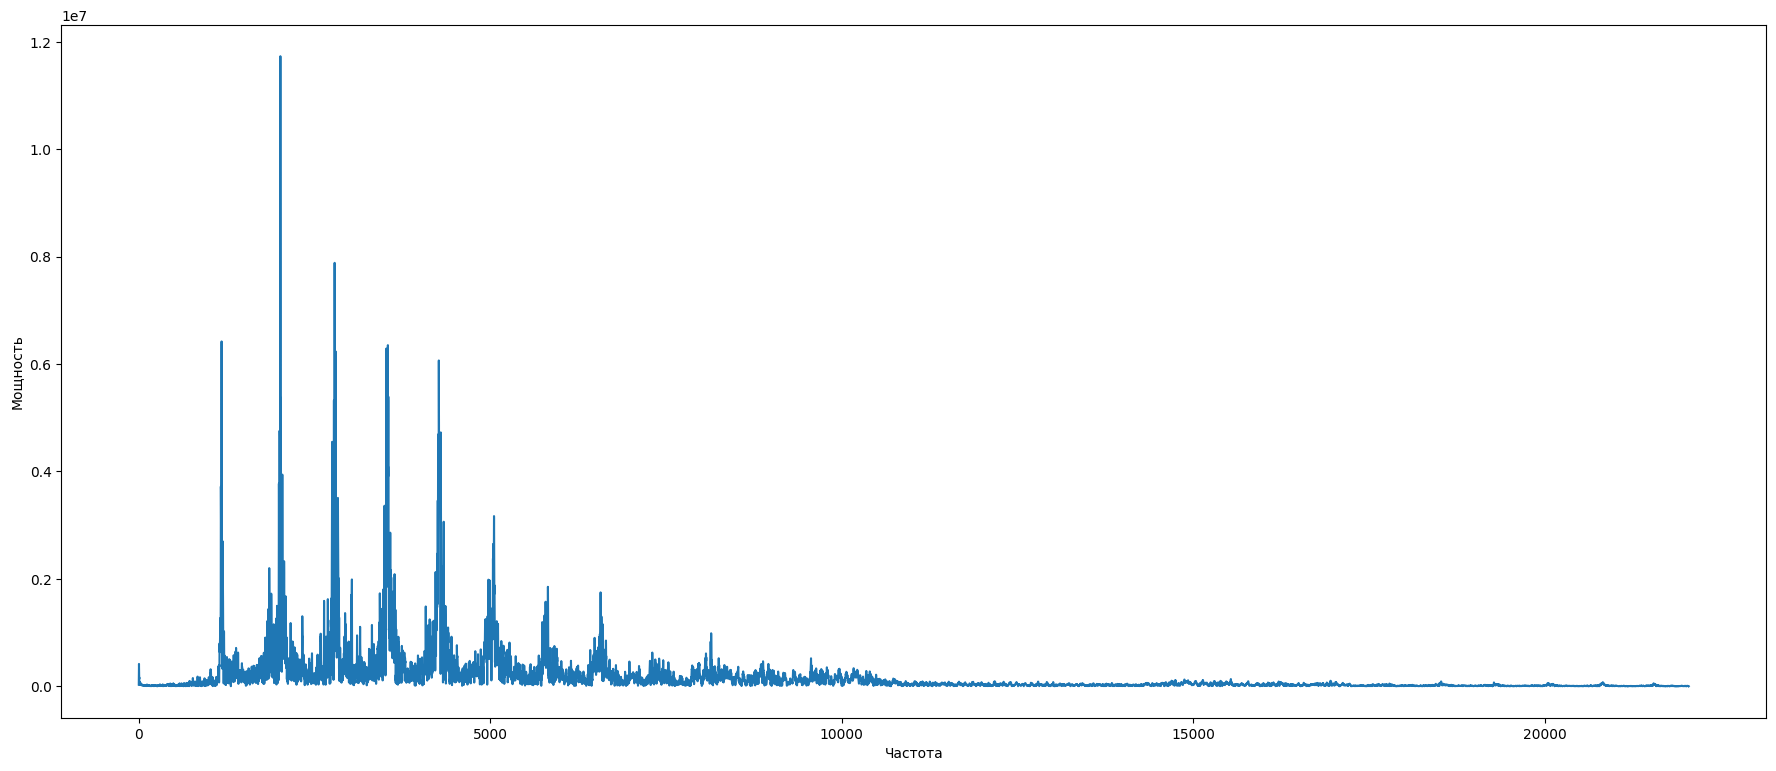

In [181]:
from scipy.fft import rfft, rfftfreq
# число точек в normalized_tone
rN = int(samplerate * duration)
ryf = rfft(data[:, 0])
rxf = rfftfreq(rN, 1 / samplerate)
plt.figure(figsize=(22, 9))
plt.plot(rxf, np.abs(ryf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()


In [182]:
# Найдем максимальную частоту около 5000
print()
i1 = list(map(int, rxf)).index(4800)
i2 = list(map(int, rxf)).index(5200)
print(max(ryf[i1:i2]))
print(list(ryf).index(max(ryf[i1:i2])))
print(rxf[list(ryf).index(max(ryf[i1:i2]))])



(2326326.2949490175+939014.4123936868j)
6776
5042.381289865344


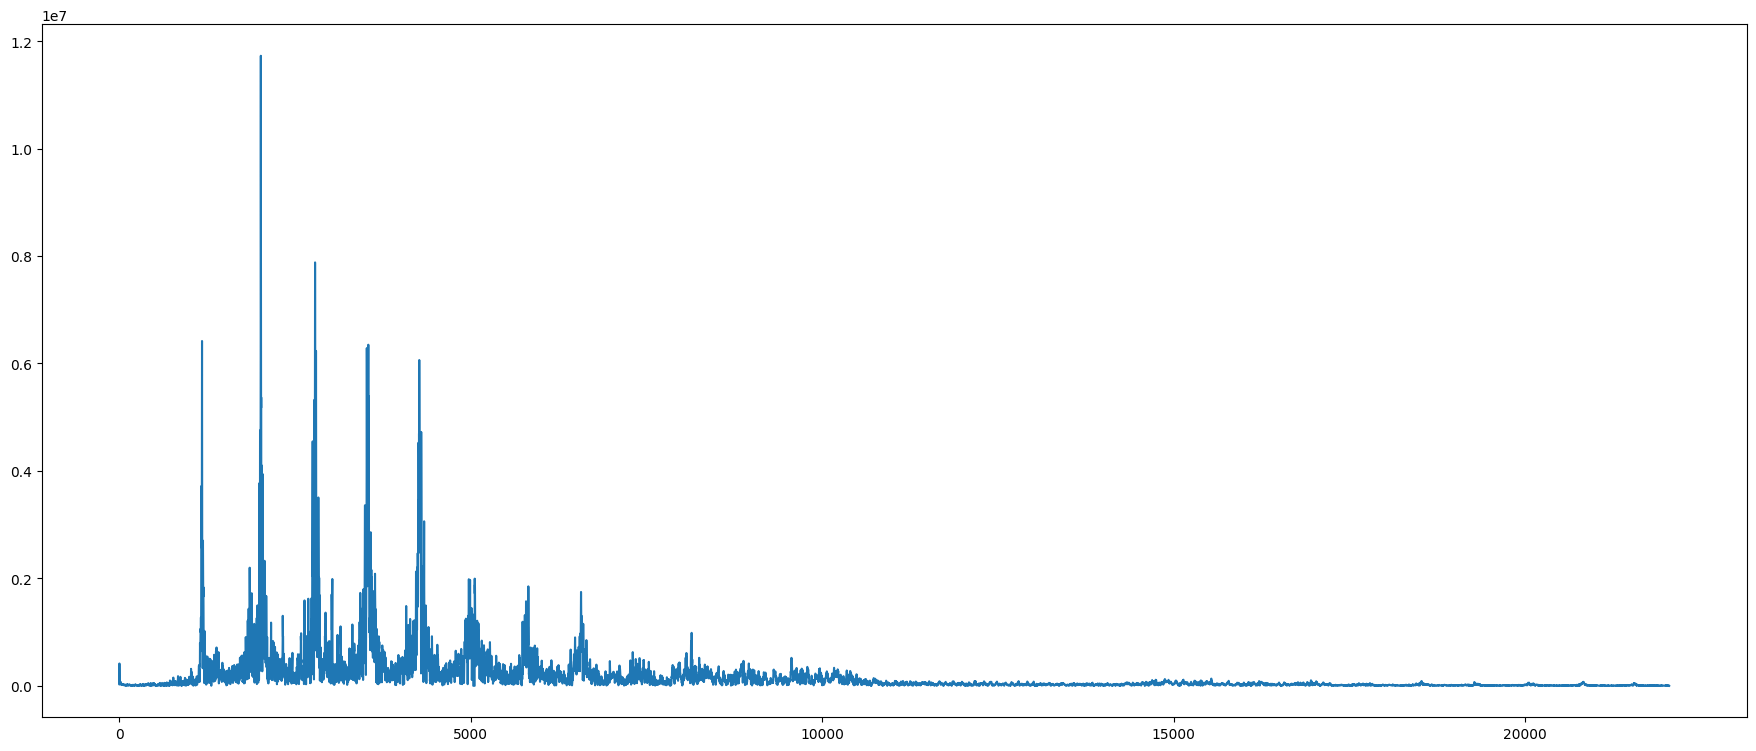

In [183]:
# Максимальная частота составляет половину частоты дискретизации
points_per_freq = len(rxf) / (samplerate / 2)
# Наша целевая частота
target_idx = int(points_per_freq * 5042.381289865344)
target_idx1 = int(points_per_freq * 10000)
ryf[target_idx-10:target_idx+20] = 0
plt.figure(figsize=(22, 9))
plt.plot(rxf, np.abs(ryf),zorder=1)
# plt.scatter((rxf[i1], rxf[i2], rxf[list(ryf).index(max(ryf[i1:i2]))]), (np.abs(ryf[i1]), np.abs(ryf[i2]), np.abs(ryf[list(ryf).index(max(ryf[i1:i2]))])), color = 'hotpink',zorder=2)
plt.show()

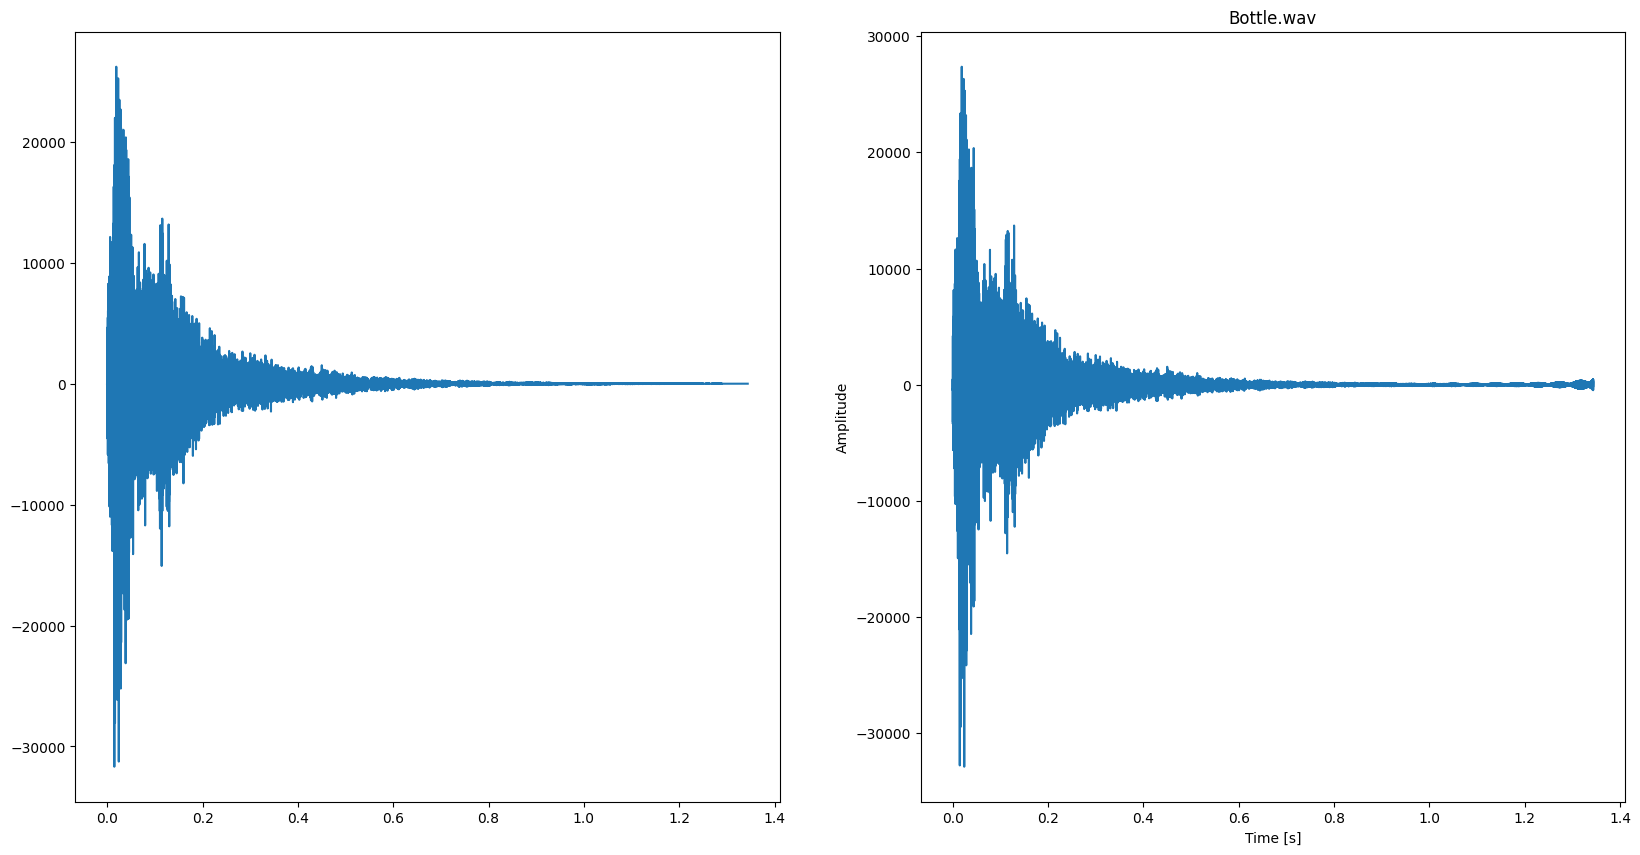

In [184]:
from scipy.fft import irfft
new_sig = irfft(ryf)
fig, ax = plt.subplots(nrows= 1 , ncols= 2, figsize=(20, 10) )
ax[0].plot(time, data[:, 0])
ax[1].plot(time, new_sig)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Bottle.wav')
plt.show()

In [185]:
# слушаем, что получилось
sd.play(data[:, 0], samplerate)
sd.wait()
sd.play(new_sig, samplerate)
sd.wait()

In [201]:
x = data[:, 0]
M = 10
mmas = [np.exp(np.log(22000)/M * i) for i in range(M)]
# mmas = [1, 10, 20, 60, 200, 600, 1500, 3500, 7000, 15000]
mmas

[1.0,
 2.7179550378707376,
 7.387279587886923,
 20.07829377205693,
 54.57189970961078,
 148.32396974191326,
 403.1378807970201,
 1095.710634068793,
 2978.0922379158173,
 8094.320801287031]

In [190]:
def B(f):
    return 1125* np.log(1 + f/700)
def B_1(b):
    return 700 * (np.exp(b/1125) - 1)
def f(m):
    return duration * B_1( B(f_l[m]) + m * (B(f_h[m]) - B(f_l[m])) / (M + 1)  )
def H(m, k):
    if k < f(m-1): return 0
    elif k > f(m-1) and k < f(m): 
        return (k-f(m-1)) / (f(m)- f(m-1))
    elif k > f(m) and k < f(m+1): 
        return (k-f(m)) / (f(m+1)- f(m))
    else:
        return 0
N = int(samplerate * duration)
yf = fft(x)
xf = fftfreq(N, 1 / samplerate)

In [188]:
def frec(m):
    return duration * B_1()
